In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats import power
import numpy as np

# Findings Summary

### Stress and Extracurriculars
* Students at CMU are significantly more stressed now compared to before the pandemic (p = 0.011)
* Stress levels did not significantly differ between students who participated in extracurricular activities and those who did not: 
    * This is true both now (p = 0.917) and prior to the pandemic (p = 0.591)
    * Among students who participated in extracurriculars, spending more time on their activity reported a significant decrease in stress (p = 0.046).
    
### Stress and Introversion
* Self-reported introverts were not significantly more stressed this semester than self-reported extraverts (p = 0.648).

### Stress and Loneliness
* Students who are lonely are significantly more likely to be stressed this semester (p = 0.01).

### Stress and Pets
* Pet-owners are not significantly more stressed than non-pet-owners, whether they lived with the pet or not (p = 0.131).
* Pet-owners did not report being significantly less lonely than non-pet-owners, even when the type of pet (e.g., cat, dog) was controlled for (p = 0.239).

In [2]:
df = pd.read_csv("./data/SPRM_survey.csv")
df.head()

,Timestamp,I lack companionship,There is no one I can turn to,I am an outgoing person,I feel left out,I feel isolation from others,I can find companionship when I want it,I am unhappy being so withdrawn,People are around me but not with me,Where would you place yourself along this scale based on the definitions provided above?,...,Do you currently live with someone who is immunocompromised?.1,What's your living situation this semester?.1,"During an average week in the Spring 2021 semester, how many hours do you spend on only *in-person* extracurricular activities (not including paid jobs)?",Do you participate in extracurricular activities (not including paid jobs)?,Are you working a paid full-time or part-time job this Spring 2021 semester?.1,"If you have a paid job, are you employed by CMU?","If you have a paid job, what is the format of it?.1",What are the formats of your extracurricular activities? Check all that apply.,"During an average week in the Spring 2021 semester, how many hours do you spend on only *online* extracurricular activities (not including paid jobs)?","During an average week in the Spring 2021 semester, how many hours do you spend on *hybrid* extracurricular activities (not including paid jobs)?"
0,4/2/2021 17:45:25,3,2.0,3,1,2,2,2.0,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/2/2021 17:52:32,2,1.0,4,2,2,3,2.0,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/2/2021 18:03:10,1,1.0,2,1,2,4,2.0,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/2/2021 18:36:52,3,2.0,3,1,2,2,2.0,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4/3/2021 0:43:14,1,1.0,3,2,2,3,2.0,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns.tolist()

['Timestamp',
 'I lack companionship',
 'There is no one I can turn to',
 'I am an outgoing person',
 'I feel left out',
 'I feel isolation from others',
 'I can find companionship when I want it',
 'I am unhappy being so withdrawn',
 'People are around me but not with me',
 'Where would you place yourself along this scale based on the definitions provided above?',
 'Are you a pet-owner?',
 'Do you  live with a pet this semester?',
 'What pet(s) do you have? Check all that apply.',
 'Do you live with more than one pet currently (during school this semester)? ',
 'If you have more than one pet, please select the one you spend the most time with to answer additional questions about, and indicate what type of animal they are below. ',
 'If you currently live with a pet, are you involved in caring for the pet you live with?',
 'How many hours per day do you spend interacting with your pet? ',
 'Is your pet a registered service animal or emotional support animal providing care for you?',
 '

# <span style="color:tomato"> Analysis of Self-Reported Stress and Extracurricular Activity </span>

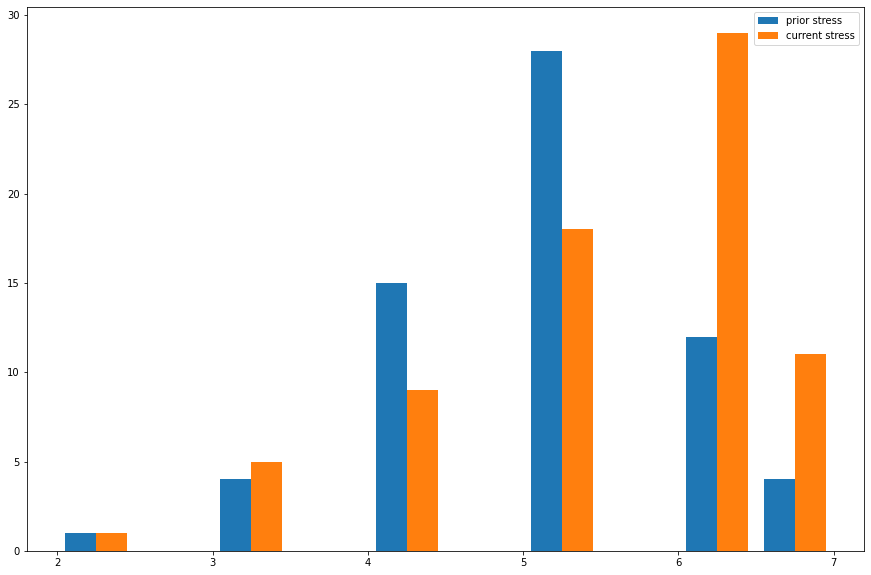

In [4]:
priorstress = df['Rate your stress level during previous semesters at CMU (prior to COVID-19).'\
                 ' Leave blank if not applicable.']
currentstress = df['Rate your stress level during this semester at CMU']

# the priorstress group has some N/A responses; drop them
priorstress = priorstress.dropna()

plt.figure(figsize=(15,10))
plt.hist([priorstress, currentstress], label=['prior stress', 'current stress'])
plt.legend(loc='upper right')
plt.show()

## Power Analysis 

We must ensure that our sample size is sufficient to perform the statistical test

In [5]:
# Cohen's d for large effect size = 0.8
effect = 0.8

# probability of type I error
alpha = 0.05

# 0.8 implies a four-to-one trade off between β-risk and α-risk. 
# β is the probability of a type II error, and α is the probability of a type I error.
power = 0.8

sample1size = len(priorstress)
sample2size = len(currentstress)
ratio = sample2size/sample1size

analysis = statsmodels.stats.power.TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=ratio, alpha=alpha)
print(f'Required sample size: {result:.3f}')
print(f'size of sample 1 is {sample1size}')
print(f'size of sample 2 is {sample2size}')

Required sample size: 23.947
size of sample 1 is 64
size of sample 2 is 73


In [6]:
t, p = stats.ttest_ind(priorstress, currentstress)
print(f'pvalue {p:.3f}')

pvalue 0.011


In [7]:
exc_yn = df['Do you participate in extracurricular activities (not including paid jobs)? ']
print(exc_yn.value_counts())

exc_format = df['What are the formats of your extracurricular activities? Check all that apply.']
print(exc_format.value_counts())

Yes    29
No      9
Name: Do you participate in extracurricular activities (not including paid jobs)? , dtype: int64
Online                       7
In-Person, Online, Hybrid    6
In-Person, Online            5
In-Person                    4
Hybrid                       4
Online, Hybrid               3
Name: What are the formats of your extracurricular activities? Check all that apply., dtype: int64


In [8]:
exc_yesgroup = df[exc_yn == 'Yes']
exc_nogroup = df[exc_yn != 'Yes']

exc_yesgroup_stresslevels_current = exc_yesgroup['Rate your stress level during this semester at CMU']
exc_nogroup_stresslevels_current = exc_nogroup['Rate your stress level during this semester at CMU']

In [9]:
t, p = stats.ttest_ind(exc_nogroup_stresslevels_current, exc_yesgroup_stresslevels_current)
print(f'pvalue {p:.3f}')

pvalue 0.917


In [10]:
exc_yesgroup_stressleves_previous = exc_yesgroup['Rate your stress level during previous semesters at CMU (prior to COVID-19).'\
                                                 ' Leave blank if not applicable.'].dropna()
exc_nogroup_stressleves_previous = exc_nogroup['Rate your stress level during previous semesters at CMU (prior to COVID-19).'\
                                               ' Leave blank if not applicable.'].dropna()

In [11]:
t, p = stats.ttest_ind(exc_nogroup_stressleves_previous, exc_yesgroup_stressleves_previous)
print(f'pvalue {p:.3f}')

pvalue 0.591


In [12]:
hours = exc_yesgroup[['During an average week in the Spring 2021 semester, '+
                      'how many hours do you spend on *hybrid* extracurricular '+
                      'activities (not including paid jobs)?  ', 
                      'During an average week in the Spring 2021 semester, '+
                      'how many hours do you spend on only *online* extracurricular '+
                      'activities (not including paid jobs)?  ',
                      'During an average week in the Spring 2021 semester, '+
                      'how many hours do you spend on only *in-person* extracurricular '+
                      'activities (not including paid jobs)?  ', 
                      'Rate your stress level during this semester at CMU']]


hours.columns = ['hybrid', 'online', 'inperson', 'stress']

timeintervals = list(enumerate(hours[['hybrid', 'online', 'inperson']].stack().unique()))
timeintervals = {k:v for v, k in timeintervals}

hours = hours.replace({'hybrid':timeintervals, 'online':timeintervals, 'inperson':timeintervals})

totaltime = hours[['hybrid', 'online', 'inperson']].sum(axis=1)

stats.pearsonr(hours.stress, totaltime)

(-0.37362440704882977, 0.04588025618988834)

# <span style="color:tomato"> Analysis of Self-Reported Stress and Extraversion/Introversion </span>

In [13]:
extraversion = df['Where would you place yourself along this scale based on the definitions provided above?']

introvert_group = df[extraversion <= 2]
extravert_group = df[extraversion >= 4]

introvert_stress = introvert_group['Rate your stress level during this semester at CMU']
extravert_stress = extravert_group['Rate your stress level during this semester at CMU']

t, p = stats.ttest_ind(introvert_stress, extravert_stress)
print(f'pvalue {p:.3f}')

pvalue 0.648


# <span style="color:tomato"> Analysis of Self-Reported Stress and Loneliness </span>

In [14]:
stress = df['Rate your stress level during this semester at CMU']
negative_labels = [0, 1, 3, 4, 6, 7]
positive_labels = [2, 5]

loneliness_labels = df.columns[1:9].values

negative_responses = df[loneliness_labels[negative_labels]].sum(axis=1) 
# positive responses must be reversed in order to add to the negative scores
positive_responses = (-1*df[loneliness_labels[positive_labels]] + 5).sum(axis=1) 

loneliness_score = negative_responses + positive_responses

np.min(loneliness_score), np.max(loneliness_score), np.mean(loneliness_score), np.std(loneliness_score)

(9.0, 31.0, 16.10958904109589, 4.415296089407842)

In [15]:
loneliness_score.value_counts().sort_index()

9.0      2
10.0     3
11.0     4
12.0     1
13.0    14
14.0    12
15.0     3
16.0     5
17.0     4
18.0     5
19.0     4
20.0     4
21.0     4
22.0     2
23.0     2
24.0     1
27.0     2
31.0     1
dtype: int64

In [16]:
stats.pearsonr(loneliness_score, stress)

(0.2998510147403011, 0.009957319074356277)

# <span style="color:tomato"> Analysis of Self-Reported Stress and Loneliness with Pet Ownership </span>

In [17]:
petowner_yesgroup = df[df['Are you a pet-owner?'] == 'Yes'] 
petowner_nogroup = df[df['Are you a pet-owner?'] == 'No'] 

petowner_yesstress = petowner_yesgroup['Rate your stress level during this semester at CMU']
petowner_nostress = petowner_nogroup['Rate your stress level during this semester at CMU']

print(petowner_yesstress.value_counts().sort_index())
print(petowner_nostress.value_counts().sort_index())

stats.ttest_ind(petowner_yesstress, petowner_nostress)

2.0     1
3.0     4
4.0     5
5.0     9
6.0    16
7.0     3
Name: Rate your stress level during this semester at CMU, dtype: int64
3.0     1
4.0     4
5.0     9
6.0    13
7.0     6
Name: Rate your stress level during this semester at CMU, dtype: int64


Ttest_indResult(statistic=-1.5282244727498577, pvalue=0.13102835226809093)

In [18]:
petowner_yesgroup = df[(df['Are you a pet-owner?'] == 'Yes') & (df['Do you  live with a pet this semester?'] == 'Yes')] 
petowner_nogroup = df[df['Are you a pet-owner?'] == 'No'] 

petowner_yesstress = petowner_yesgroup['Rate your stress level during this semester at CMU']
petowner_nostress = petowner_nogroup['Rate your stress level during this semester at CMU']

print(petowner_yesstress.value_counts().sort_index())
print(petowner_nostress.value_counts().sort_index())

stats.ttest_ind(petowner_yesstress, petowner_nostress)

3.0    3
4.0    2
5.0    4
6.0    8
7.0    1
Name: Rate your stress level during this semester at CMU, dtype: int64
3.0     1
4.0     4
5.0     9
6.0    13
7.0     6
Name: Rate your stress level during this semester at CMU, dtype: int64


Ttest_indResult(statistic=-1.4349569892329497, pvalue=0.1576517430884806)

In [19]:
petowner_yesgroup = df[(df['Are you a pet-owner?'] == 'Yes') & (df['Do you  live with a pet this semester?'] == 'Yes')] 
petowner_nogroup = df[df['Are you a pet-owner?'] == 'No'] 

petowner_yesloneliness = loneliness_score[loneliness_score.index.isin(petowner_yesgroup.index)]
petowner_noloneliness = loneliness_score[loneliness_score.index.isin(petowner_nogroup.index)]

t, p = stats.ttest_ind(petowner_yesloneliness, petowner_noloneliness)
print(f"p value {p:.3f}")

p value 0.962


In [20]:
dogs = df['What pet(s) do you have? Check all that apply.'].str.contains("Dog").fillna(False)
cats = df['What pet(s) do you have? Check all that apply.'].str.contains("Cat").fillna(False)
other = df['What pet(s) do you have? Check all that apply.'].fillna("None")
other = other[~other.str.contains("Dog|Cat")]

doggroup = df[dogs & ~cats]
catgroup = df[cats]
othergroup = df.iloc[other.index]

doggroup_loneliness = loneliness_score[loneliness_score.index.isin(doggroup.index)]
catgroup_loneliness = loneliness_score[loneliness_score.index.isin(catgroup.index)]
othergroup_loneliness = loneliness_score[loneliness_score.index.isin(othergroup.index)]

F, p = stats.f_oneway(doggroup_loneliness, catgroup_loneliness, othergroup_loneliness)
print(f"p value {p:.3f}")

p value 0.239


# <span style="color:tomato"> Demographics </span>

In [21]:
race = df['What race(s) do you identify as? Check all that apply.']
race.value_counts()

Asian                                                                 34
White                                                                 25
Asian, White                                                           7
Black or African American                                              4
Native Hawaiian or Other Pacific Islander, White                       2
American Indian or Alaska Native, Asian, Black or African American     1
Name: What race(s) do you identify as? Check all that apply., dtype: int64

In [22]:
gender = df['What gender do you identify as?']
gender.value_counts()

Female    52
Male      21
Name: What gender do you identify as?, dtype: int64

In [23]:
year = df['What school year are you in?']
year.value_counts()

second year                                   23
fourth year                                   22
first year                                    13
third year                                    12
5th year or above (grad students included)     3
Name: What school year are you in?, dtype: int64

In [24]:
df.groupby("What is your primary "+
           "academic college at CMU?").apply(lambda x: x[("Rate your stress level "+ 
                                                          "during previous semesters at CMU "+
                                                          "(prior to COVID-19). Leave blank "+ 
                                                          "if not applicable.")].mean())

What is your primary academic college at CMU?
Carnegie Institute of Technology    4.666667
College of Fine Arts                     NaN
Dietrich College                    4.647059
Mellon College of Science           5.545455
School of Computer Science          5.166667
Tepper School of Business           5.000000
dtype: float64

In [25]:
df["What is your primary academic college at CMU?"].value_counts()

Carnegie Institute of Technology    24
Dietrich College                    20
Mellon College of Science           12
Tepper School of Business            9
School of Computer Science           6
College of Fine Arts                 2
Name: What is your primary academic college at CMU?, dtype: int64

In [26]:
df['What pet(s) do you have? Check all that apply.'].value_counts()

Dog                                     21
Cat                                      9
Dog, Cat                                 3
Dog, Cat, Fish                           3
Dog, Fish                                2
Fish, frog                               2
Fish                                     1
None                                     1
Dog, Lizard/Gecko                        1
Dog, Cat, 9 chickens in the backyard     1
Name: What pet(s) do you have? Check all that apply., dtype: int64